In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [12]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv讀進來是BGR，而非RGB

## 1-1. cluster with only RGB values

In [13]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [14]:
h,w,c=img.shape
print(img.shape) #resolutionx3 (RGB)

(1024, 1024, 3)


In [15]:
Z=img.reshape((-1,3)) #降1024x1024的維度
print(Z.shape) #2D
Z

(1048576, 3)


array([[129, 175, 100],
       [129, 175, 100],
       [129, 175, 100],
       ...,
       [153, 207, 109],
       [153, 207, 109],
       [153, 207, 109]], dtype=uint8)

In [29]:
#呼叫函式
K=2
label, center=km_clust(Z,K) #(資料, 分群) ，函式結果return，由labels, center接

#output函式所print的群中心座標

[[163.22597756 197.72311134 120.58332123]
 [107.69008695  95.56129696  71.60061825]]


In [21]:
#Now convert back into uint8, and make original image
center=np.uint8(center[:,:3]) #所有維度都轉換
center

array([[163, 197, 120],
       [107,  95,  71]], dtype=uint8)

In [22]:
label.shape #一本資料 1024x1024

(1048576,)

In [23]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
label.flatten() #保險起見，降資料至一維

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
res=center[label.flatten()] #label中，0用[163, 197, 120]取代，1用[107,  95,  71]
res #2D
res=res.reshape(img.shape) #降回與img.shape資料一樣

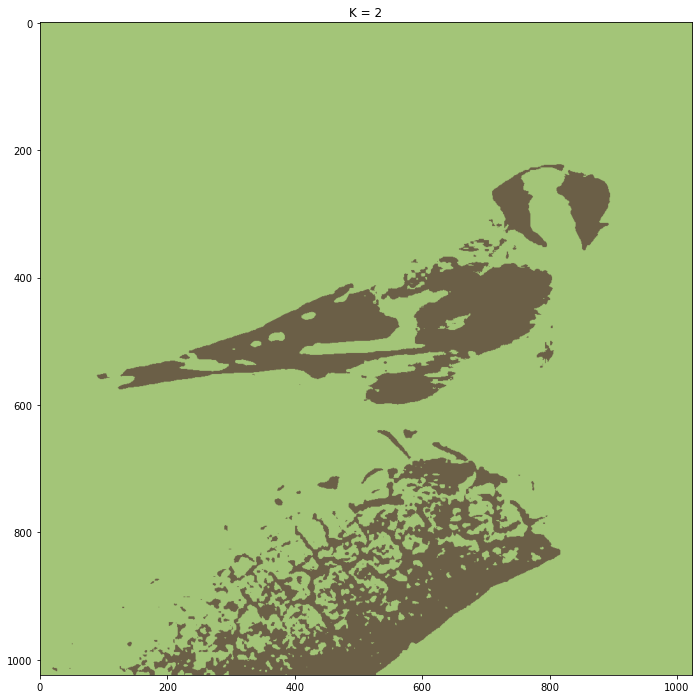

In [27]:
#K=2的結果
plt.figure(figsize=(16,12))
plt.title("K = {}".format(K))
plt.imshow(res)

[[163.22627536 197.72436505 120.58396853]
 [107.6958206   95.56751108  71.60331411]]
[[143.94510551 128.31232078  97.22578491]
 [ 58.37121466  55.1944636   46.14034085]
 [160.65504252 204.76077739 114.71484166]
 [183.98456705 182.78074014 164.96576467]]
[[163.40214921 211.85012337 117.64611941]
 [ 38.34742183  40.5339856   40.97727204]
 [149.49065577 134.00834974 104.43719968]
 [170.70857492 165.30647484 143.5816268 ]
 [154.67529936 192.72734493 110.89348788]
 [115.30559836  99.49199088  67.78229327]
 [220.26154365 190.84984833  36.86265588]
 [198.97056255 200.08091277 187.99993106]]


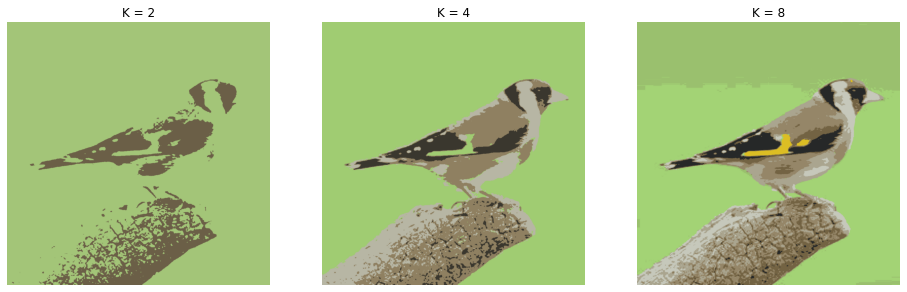

In [31]:
h, w, c = img.shape
Z=img.reshape((-1,3))
Ka = [2,4,8]
#Ka = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, len(Ka), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

[[156.43996964 180.19571094 110.39210251 513.62077958 768.08978266]
 [154.45957559 186.61713452 117.03751684 509.38919631 256.11718399]]
[[157.032937   178.83620067 122.65593094 767.7776629  256.93204677]
 [155.59331316 177.46626557 109.28661721 256.3519045  766.60056477]
 [151.88085396 194.0738565  111.33822682 255.43957768 254.82553697]
 [157.28645599 183.32399396 111.57866077 768.00620961 769.15651893]]
[[157.61219699 196.12354218 111.31618885 200.15923854 510.0507839 ]
 [160.40500657 203.10207124 117.81933161 846.47033758 865.21028421]
 [147.97068862 186.97808715 110.57533509 514.16869189 248.24548447]
 [146.25728876 144.3210472  104.25255325 822.70826059 519.13476199]
 [157.74545211 182.86170721 114.61565598 174.2943498  860.39729012]
 [158.40742898 174.75101073 108.36790031 507.97403582 777.13535367]
 [152.49177123 194.83374332 112.04245662 177.50486603 161.6984056 ]
 [164.85424447 189.72246267 134.32296227 845.77162219 164.1612132 ]]


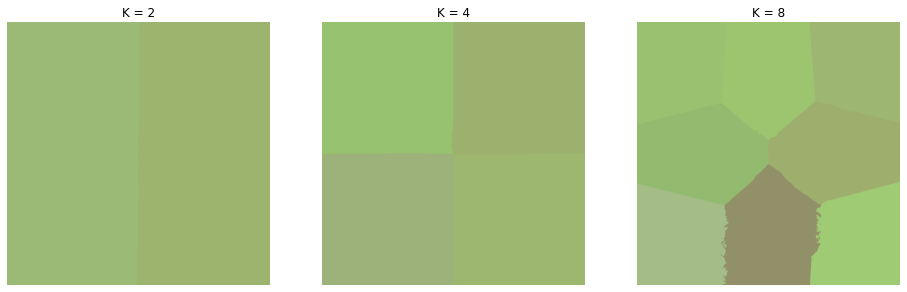

In [32]:
h, w, c = img.shape #h:高； w:寬; c:顏色RGB

#Added location feature
Z = np.zeros((h, w, c+2)) #h:row;w=column
for h in range(len(img)):
    for w in range(len(img[h])): #圖形h row時的column長度
        Z[h][w] = np.append(img[h][w], [[h], [w]]) #img[h][w]: RGB的值； [[h], [w]]:現在位置
Z = Z.reshape(-1, 5) #3個變成5個特徵值

Ks = [2,4,8]
#Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [ ]:
#單純RGB，是以色彩去分。K越大，色彩越多。
#加入座標，色彩會與位置有關，且位置影響比較大。鄰近的區域，會有相同的色塊。
#同樣K=2,色彩在空間上的差異是很大的


In [34]:
h, w, c = img.shape 
print(img.shape)
#h,w是1024，c為0~255。會有scale上的差異。
#因此將解析度縮放至與c相同，表現應該會好一些。

(1024, 1024, 3)


[[158.21430376 193.72361679 120.05712732 121.1214135   61.190576  ]
 [152.97583413 174.20454139 108.06413236 133.90788884 187.44330753]]
[[114.24360741 102.20688147  76.20158527 173.87947991 137.41126162]
 [166.13103681 200.18745842 129.372182   165.73455885  51.02455642]
 [167.57477967 206.35632842 123.00713347 170.42208575 211.60000345]
 [157.87795243 192.34259731 112.37947475  45.50601807 126.76085916]]
[[156.22086193 200.98970972 114.55117287  67.58608774  41.84553677]
 [164.60091169 211.3549062  120.3554088  194.57212612 212.34722547]
 [162.73376378 145.19381971 105.91511278 124.21038794 156.60076444]
 [158.0484464  199.65435625 110.68354057  45.10145746 125.97285766]
 [ 47.13531616  48.03469513  45.96307226 116.66831759 136.70260855]
 [167.98357958 200.4170466  133.5941936  188.12210003  53.0406047 ]
 [132.14091289 119.81834434  90.21370972 218.42092933 127.9353969 ]
 [166.63899204 198.49788556 122.23727169  56.60518757 220.70168435]]


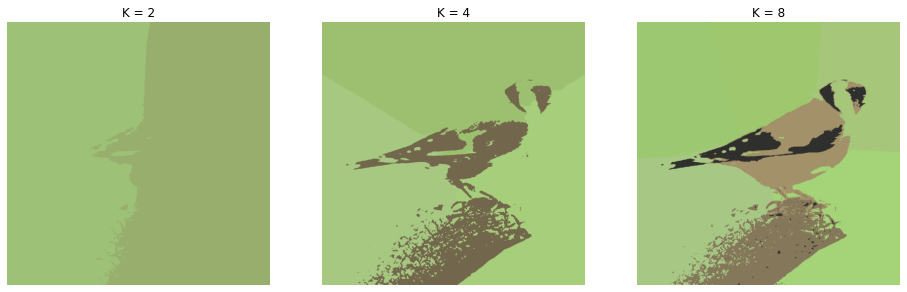

In [35]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]]) #除4，確保與RGB特徵值範圍相同。畫出來的結果，pixel和座標位置的關係較明顯。
Z = Z.reshape(-1, 5)

Ks = [2,4,8]
#Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()